In [66]:
%pip install numpy
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



# Imports

In [67]:
import numpy as np
import pandas as pd

# Utils

In [68]:

import matplotlib.pyplot as plt

def plot_mean_values(df, title, x_label='Deltas', y_label='Média'):
    mean_values = df.mean(axis=0)

    plt.figure(figsize=(10, 6))
    plt.plot(df.columns, mean_values, marker='o')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.title(title)
    plt.grid(True)
    plt.show()

In [69]:
def process_model_data(df, model_name, columns, column_name = "len_milp_relaxed"):
    model_data = df.query(f'modelo == "{model_name}"')[column_name]
    model_data = model_data.apply(eval)
    df_model = pd.DataFrame(model_data.tolist(), columns=columns)
    mean_values = np.mean(df_model, axis=0).to_list()
    std_values = np.std(df_model, axis=0).to_list()
    return df_model, mean_values, std_values

In [70]:
def format_mean_std(
    m1_mean: list,
    m2_mean: list,
    m3_mean: list,
    m1_std: list,
    m2_std: list,
    m3_std: list,
    columns: list,
    mean_format: str = "{:.2f}",
    std_format: str = "{:.4f}",
):
    df_mean = pd.DataFrame(
        [m1_mean, m2_mean, m3_mean], 
        columns=columns, index=["1L20N", "2L20N", "3L20N"]
    )
    df_std = pd.DataFrame(
        [m1_std, m2_std, m3_std], 
        columns=columns, index=["1L20N", "2L20N", "3L20N"]
    )

    df_formatted = (
        df_mean.apply(lambda row: row.map(mean_format.format))
        + " ± "
        + df_std.apply(lambda row: row.map(std_format.format))
    )
    df_formatted = df_formatted.T
    return df_formatted

# Data

In [71]:
iris = pd.read_csv('explanations_iris.csv')
wine = pd.read_csv('explanations_wine.csv')
breast_cancer = pd.read_csv('explanations_breast_cancer.csv')
glass = pd.read_csv('explanations_glass.csv')
digits = pd.read_csv('explanations_digits.csv')
data = pd.concat([iris, wine, breast_cancer, glass, digits], ignore_index=True)

In [72]:
deltas = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Iris

### Tamanho

In [73]:
iris_m1, iris_m1_mean, iris_m1_std = process_model_data(iris, 'model_1layers_20neurons.h5', deltas)
iris_m2, iris_m2_mean, iris_m2_std = process_model_data(iris, 'model_2layers_20neurons.h5', deltas)
iris_m3, iris_m3_mean, iris_m3_std = process_model_data(iris, 'model_3layers_20neurons.h5', deltas)

format_mean_std(iris_m1_mean, iris_m2_mean, iris_m3_mean, iris_m1_std, iris_m2_std, iris_m3_std, deltas)

,1L20N,2L20N,3L20N
0.1,2.49 ± 1.9313,1.71 ± 1.9354,2.65 ± 1.8675
0.2,2.50 ± 1.9261,1.81 ± 1.9220,2.71 ± 1.8127
0.3,2.51 ± 1.9261,1.90 ± 1.8841,2.82 ± 1.7110
0.4,2.51 ± 1.9261,1.99 ± 1.8466,2.91 ± 1.6068
0.5,2.51 ± 1.9261,2.07 ± 1.8180,3.04 ± 1.4691
0.6,2.51 ± 1.9261,2.11 ± 1.7939,3.10 ± 1.3892
0.7,2.52 ± 1.9312,2.18 ± 1.7685,3.16 ± 1.3017
0.8,2.52 ± 1.9312,2.21 ± 1.7680,3.19 ± 1.2704
0.9,2.52 ± 1.9312,2.27 ± 1.7427,3.26 ± 1.1543
1.0,2.52 ± 1.9312,2.30 ± 1.7292,3.34 ± 1.0509


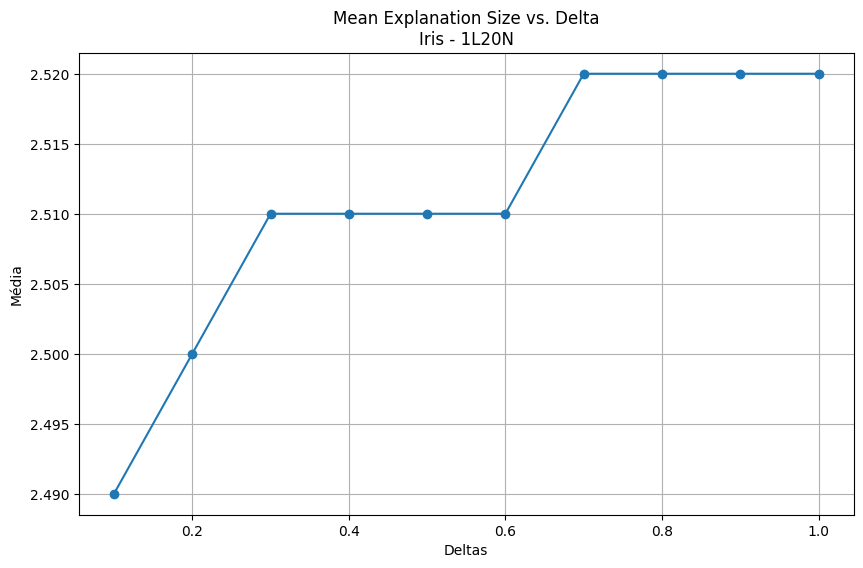

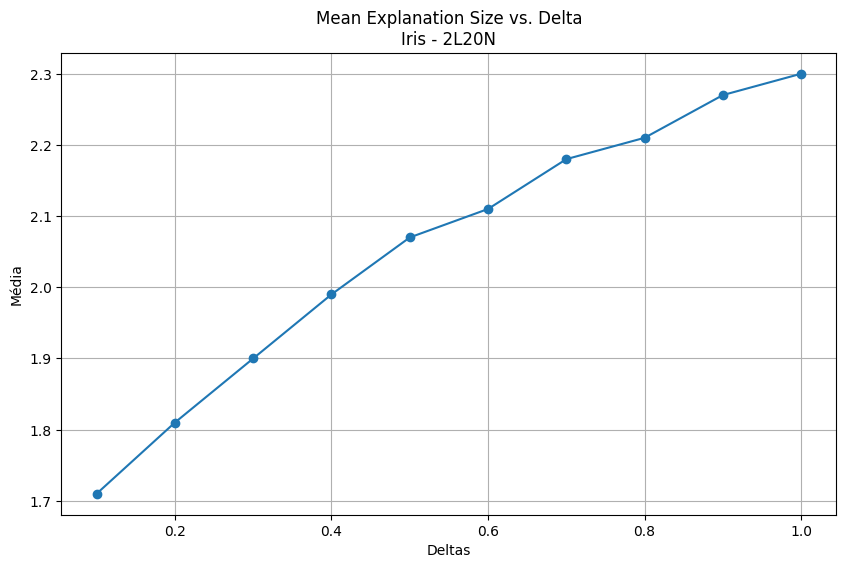

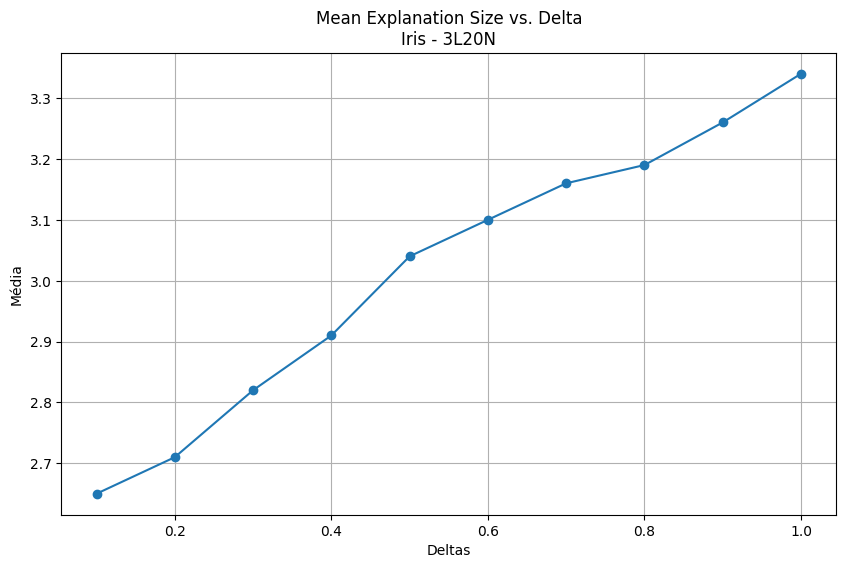

In [74]:
plot_mean_values(iris_m1, 'Mean Explanation Size vs. Delta\nIris - 1L20N')
plot_mean_values(iris_m2, 'Mean Explanation Size vs. Delta\nIris - 2L20N')
plot_mean_values(iris_m3, 'Mean Explanation Size vs. Delta\nIris - 3L20N')

### Tempo

In [ ]:
iris_m1, iris_m1_mean, iris_m1_std = process_model_data(iris, "model_1layers_20neurons.h5", deltas, column_name="time_milp_relaxed")
iris_m2, iris_m2_mean, iris_m2_std = process_model_data(iris, "model_2layers_20neurons.h5", deltas, column_name="time_milp_relaxed")
iris_m3, iris_m3_mean, iris_m3_std = process_model_data(iris, "model_3layers_20neurons.h5", deltas, column_name="time_milp_relaxed")

format_mean_std(
    iris_m1_mean,
    iris_m2_mean,
    iris_m3_mean,
    iris_m1_std,
    iris_m2_std,
    iris_m3_std,
    deltas,
    mean_format="{:.4f}",
    std_format="{:.4f}",
)

,1L20N,2L20N,3L20N
0.1,0.0395 ± 0.0160,0.0534 ± 0.0222,0.0737 ± 0.0291
0.2,0.0365 ± 0.0067,0.0510 ± 0.0229,0.0598 ± 0.0216
0.3,0.0384 ± 0.0106,0.0466 ± 0.0119,0.0595 ± 0.0292
0.4,0.0410 ± 0.0227,0.0473 ± 0.0223,0.0563 ± 0.0206
0.5,0.0347 ± 0.0056,0.0478 ± 0.0174,0.0588 ± 0.0213
0.6,0.0365 ± 0.0177,0.0477 ± 0.0200,0.0620 ± 0.0279
0.7,0.0337 ± 0.0069,0.0472 ± 0.0141,0.0600 ± 0.0279
0.8,0.0352 ± 0.0072,0.0469 ± 0.0104,0.0598 ± 0.0236
0.9,0.0385 ± 0.0229,0.0509 ± 0.0191,0.0586 ± 0.0096
1.0,0.0378 ± 0.0179,0.0594 ± 0.0445,0.0589 ± 0.0133


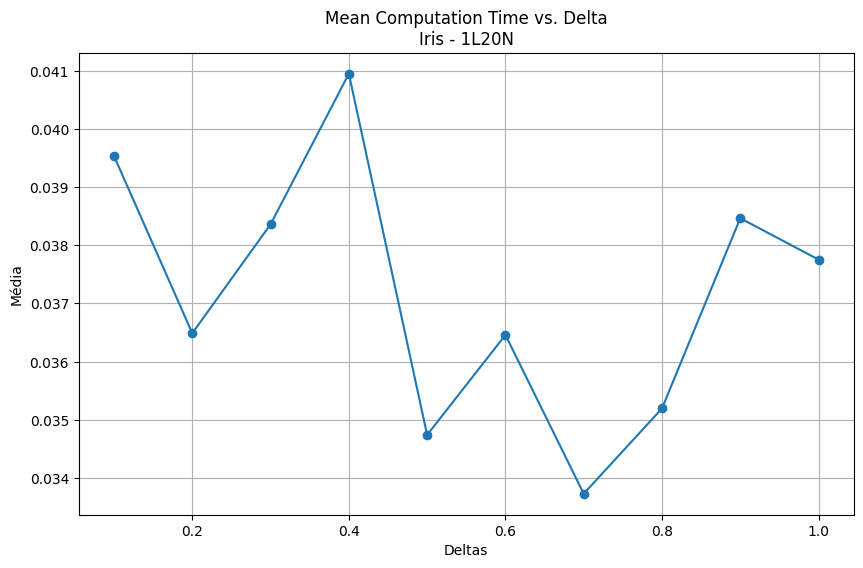

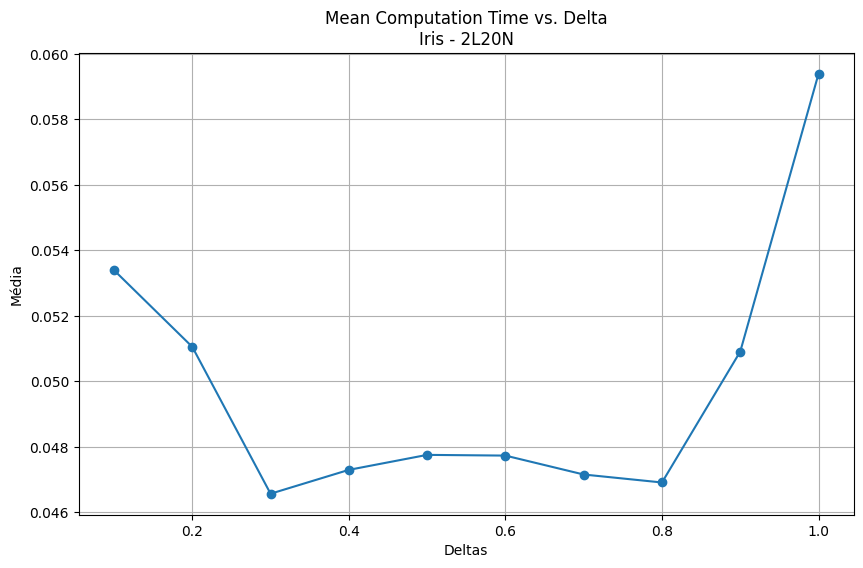

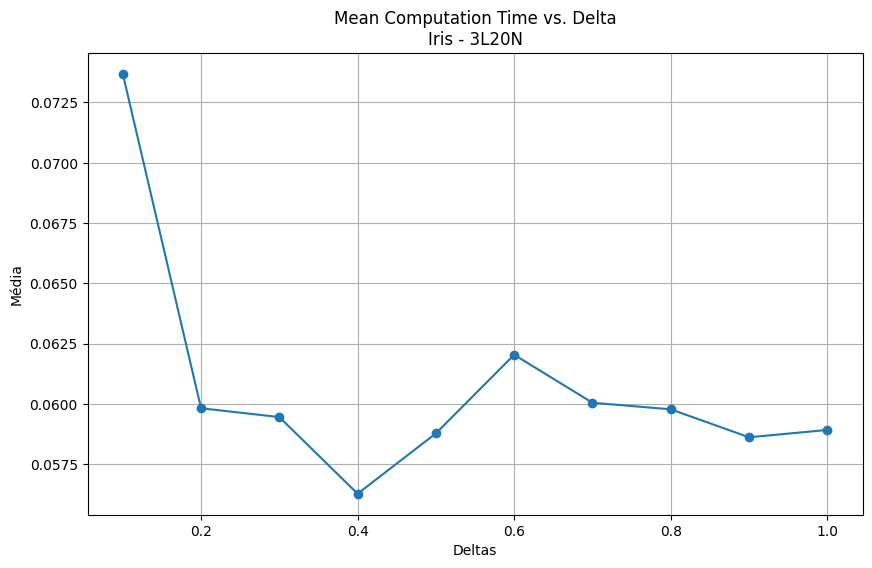

In [76]:
plot_mean_values(iris_m1, 'Mean Computation Time vs. Delta\nIris - 1L20N')
plot_mean_values(iris_m2, 'Mean Computation Time vs. Delta\nIris - 2L20N')
plot_mean_values(iris_m3, 'Mean Computation Time vs. Delta\nIris - 3L20N')

# Wine

### Tamanho

In [77]:
wine_m1, wine_m1_mean, wine_m1_std = process_model_data(wine, 'model_1layers_20neurons.h5', deltas)
wine_m2, wine_m2_mean, wine_m2_std = process_model_data(wine, 'model_2layers_20neurons.h5', deltas)
wine_m3, wine_m3_mean, wine_m3_std = process_model_data(wine, 'model_3layers_20neurons.h5', deltas)

format_mean_std(wine_m1_mean, wine_m2_mean, wine_m3_mean, wine_m1_std, wine_m2_std, wine_m3_std, deltas)

,1L20N,2L20N,3L20N
0.1,12.44 ± 2.5152,12.87 ± 1.2935,13.00 ± 0.0000
0.2,12.49 ± 2.3558,12.87 ± 1.2935,13.00 ± 0.0000
0.3,12.50 ± 2.3302,12.87 ± 1.2935,13.00 ± 0.0000
0.4,12.55 ± 2.1743,12.89 ± 1.0945,13.00 ± 0.0000
0.5,12.55 ± 2.1418,12.91 ± 0.8955,13.00 ± 0.0000
0.6,12.58 ± 2.0454,12.91 ± 0.8955,13.00 ± 0.0000
0.7,12.59 ± 2.0352,12.92 ± 0.7960,13.00 ± 0.0000
0.8,12.60 ± 1.9442,12.93 ± 0.6965,13.00 ± 0.0000
0.9,12.63 ± 1.9008,12.94 ± 0.5970,13.00 ± 0.0000
1.0,12.67 ± 1.7091,12.94 ± 0.5970,13.00 ± 0.0000


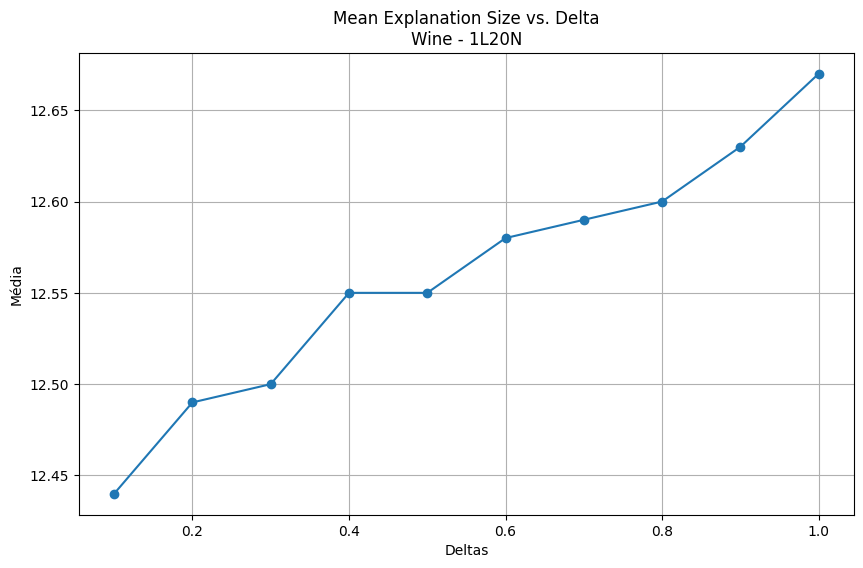

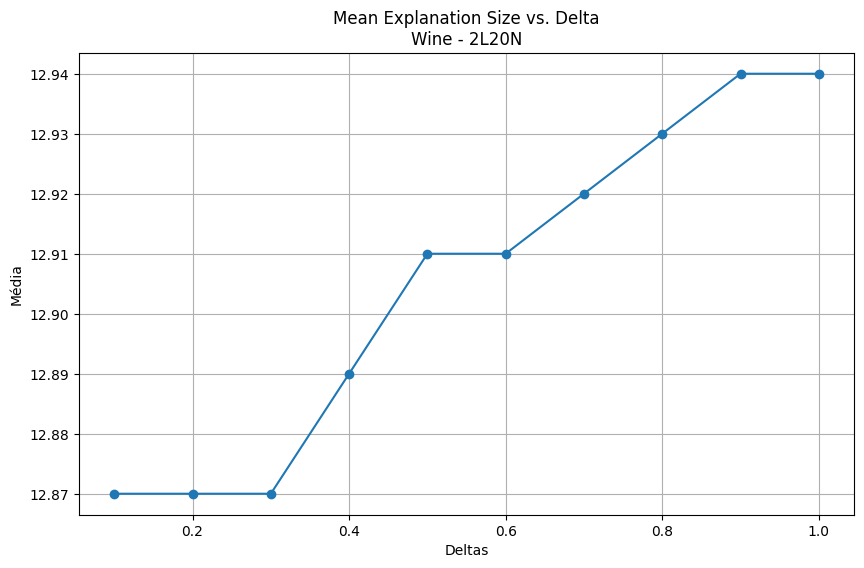

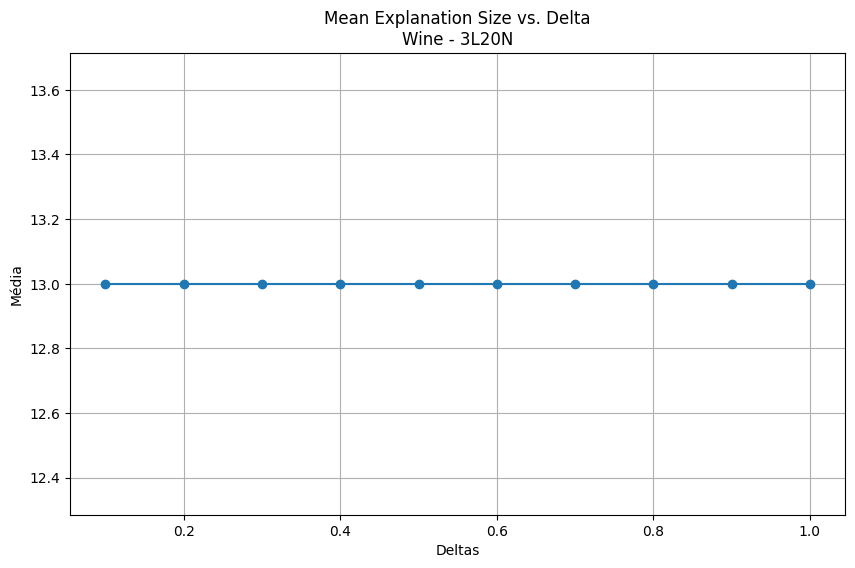

In [78]:
plot_mean_values(wine_m1, 'Mean Explanation Size vs. Delta\nWine - 1L20N')
plot_mean_values(wine_m2, 'Mean Explanation Size vs. Delta\nWine - 2L20N')
plot_mean_values(wine_m3, 'Mean Explanation Size vs. Delta\nWine - 3L20N')

### Tempo

In [79]:
wine_m1, wine_m1_mean, wine_m1_std = process_model_data(wine, 'model_1layers_20neurons.h5', deltas, column_name='time_milp_relaxed')
wine_m2, wine_m2_mean, wine_m2_std = process_model_data(wine, 'model_2layers_20neurons.h5', deltas, column_name='time_milp_relaxed')
wine_m3, wine_m3_mean, wine_m3_std = process_model_data(wine, 'model_3layers_20neurons.h5', deltas, column_name='time_milp_relaxed')

format_mean_std(wine_m1_mean, wine_m2_mean, wine_m3_mean, wine_m1_std, wine_m2_std, wine_m3_std, deltas, mean_format="{:.4f}", std_format="{:.4f}")

,1L20N,2L20N,3L20N
0.1,0.1303 ± 0.0439,0.1631 ± 0.0653,0.1886 ± 0.0540
0.2,0.1157 ± 0.0314,0.1481 ± 0.0686,0.1828 ± 0.0530
0.3,0.1190 ± 0.0461,0.1387 ± 0.0326,0.1830 ± 0.0697
0.4,0.1114 ± 0.0267,0.1406 ± 0.0324,0.1792 ± 0.0648
0.5,0.1138 ± 0.0291,0.1538 ± 0.0737,0.1872 ± 0.0606
0.6,0.1146 ± 0.0275,0.1499 ± 0.0466,0.1906 ± 0.0721
0.7,0.1114 ± 0.0192,0.1588 ± 0.0646,0.2046 ± 0.0791
0.8,0.1146 ± 0.0312,0.1568 ± 0.0549,0.2014 ± 0.0724
0.9,0.1144 ± 0.0247,0.1573 ± 0.0634,0.1879 ± 0.0554
1.0,0.1147 ± 0.0202,0.1618 ± 0.0622,0.1922 ± 0.0620


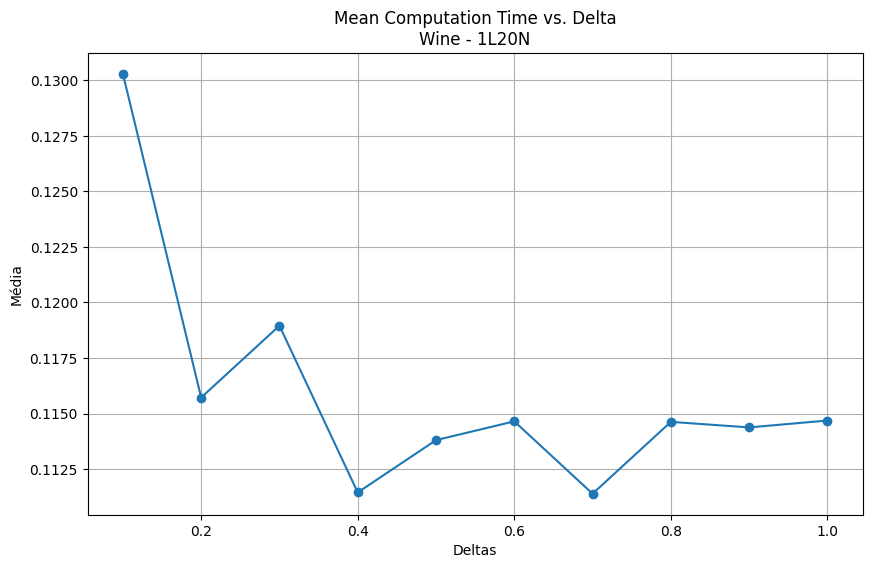

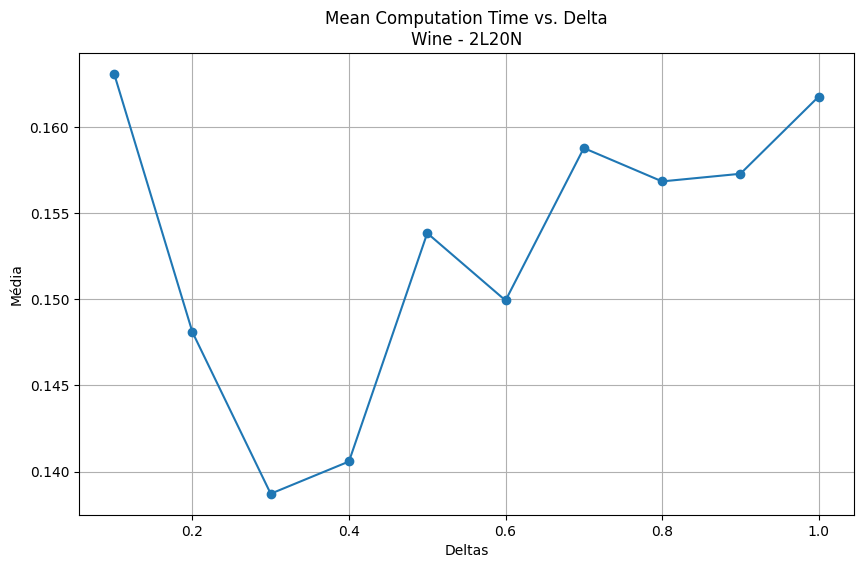

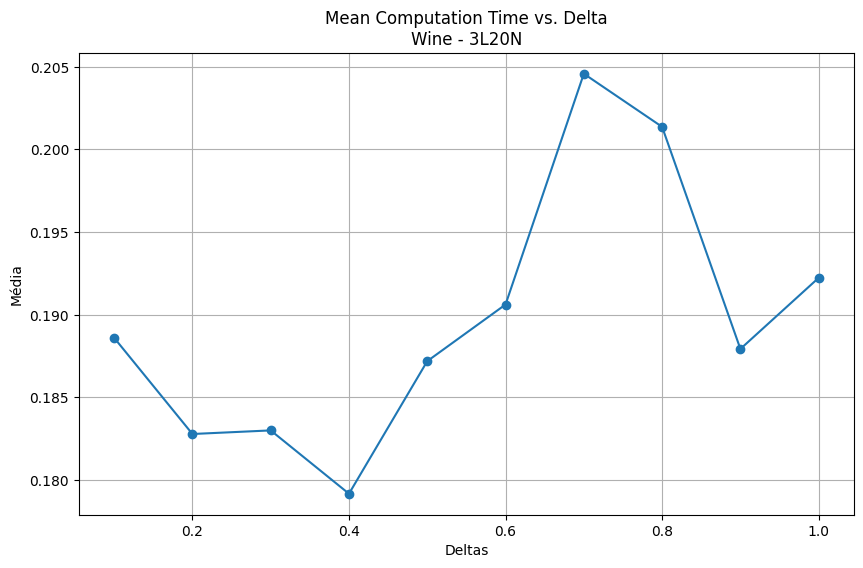

In [80]:
plot_mean_values(wine_m1, 'Mean Computation Time vs. Delta\nWine - 1L20N')
plot_mean_values(wine_m2, 'Mean Computation Time vs. Delta\nWine - 2L20N')
plot_mean_values(wine_m3, 'Mean Computation Time vs. Delta\nWine - 3L20N')

# Breast Cancer

### Tamanho

In [81]:
breast_cancer_m1, breast_cancer_m1_mean, breast_cancer_m1_std = process_model_data(breast_cancer, 'model_1layers_20neurons.h5', deltas)
breast_cancer_m2, breast_cancer_m2_mean, breast_cancer_m2_std = process_model_data(breast_cancer, 'model_2layers_20neurons.h5', deltas)
breast_cancer_m3, breast_cancer_m3_mean, breast_cancer_m3_std = process_model_data(breast_cancer, 'model_3layers_20neurons.h5', deltas)

format_mean_std(breast_cancer_m1_mean, breast_cancer_m2_mean, breast_cancer_m3_mean, breast_cancer_m1_std, breast_cancer_m2_std, breast_cancer_m3_std, deltas)

,1L20N,2L20N,3L20N
0.1,25.03 ± 10.6230,30.00 ± 0.0000,30.00 ± 0.0000
0.2,25.95 ± 9.1546,30.00 ± 0.0000,30.00 ± 0.0000
0.3,26.52 ± 8.2480,30.00 ± 0.0000,30.00 ± 0.0000
0.4,27.15 ± 6.6879,30.00 ± 0.0000,30.00 ± 0.0000
0.5,27.54 ± 5.6946,30.00 ± 0.0000,30.00 ± 0.0000
0.6,27.77 ± 5.1242,30.00 ± 0.0000,30.00 ± 0.0000
0.7,27.97 ± 4.6743,30.00 ± 0.0000,30.00 ± 0.0000
0.8,28.14 ± 4.2942,30.00 ± 0.0000,30.00 ± 0.0000
0.9,28.22 ± 4.0684,30.00 ± 0.0000,30.00 ± 0.0000
1.0,28.34 ± 3.7848,30.00 ± 0.0000,30.00 ± 0.0000


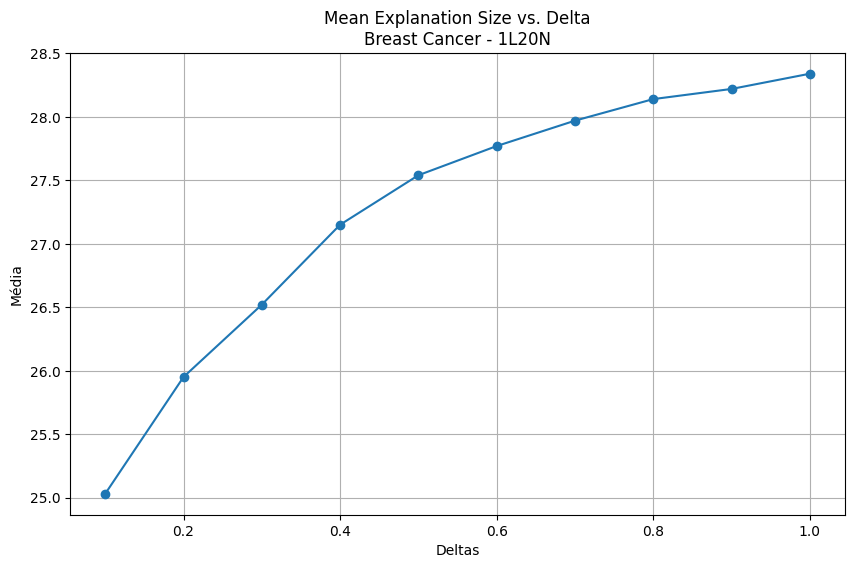

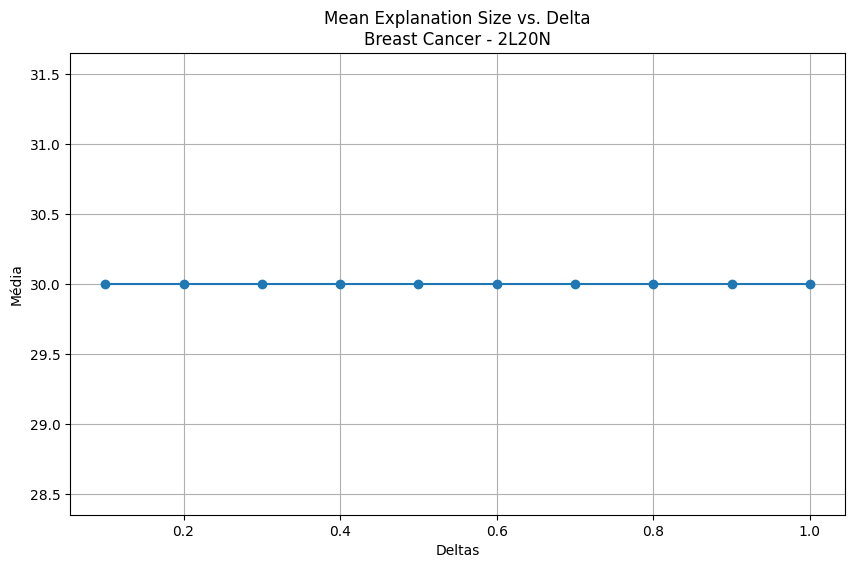

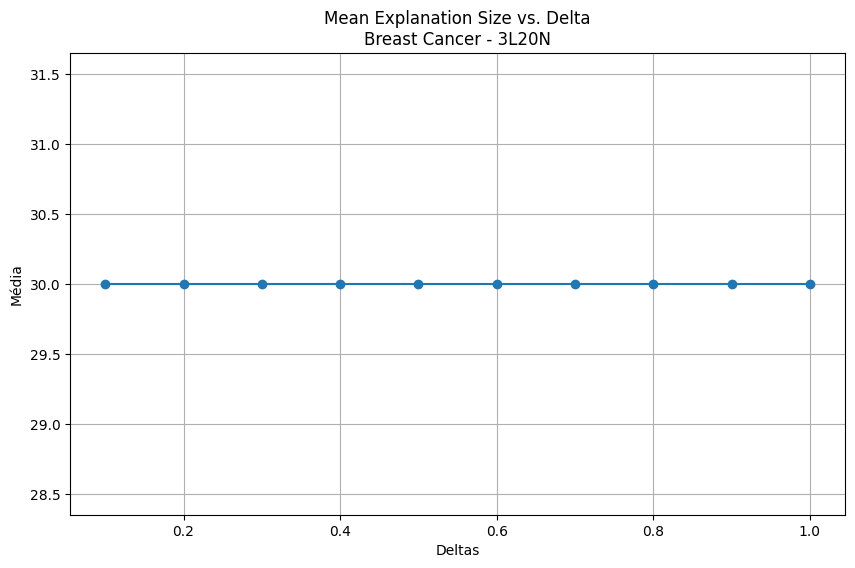

In [82]:
plot_mean_values(breast_cancer_m1, 'Mean Explanation Size vs. Delta\nBreast Cancer - 1L20N')
plot_mean_values(breast_cancer_m2, 'Mean Explanation Size vs. Delta\nBreast Cancer - 2L20N')
plot_mean_values(breast_cancer_m3, 'Mean Explanation Size vs. Delta\nBreast Cancer - 3L20N')

### Tempo

In [83]:
breast_cancer_m1, breast_cancer_m1_mean, breast_cancer_m1_std = process_model_data(breast_cancer, 'model_1layers_20neurons.h5', deltas, column_name='time_milp_relaxed')
breast_cancer_m2, breast_cancer_m2_mean, breast_cancer_m2_std = process_model_data(breast_cancer, 'model_2layers_20neurons.h5', deltas, column_name='time_milp_relaxed')
breast_cancer_m3, breast_cancer_m3_mean, breast_cancer_m3_std = process_model_data(breast_cancer, 'model_3layers_20neurons.h5', deltas, column_name='time_milp_relaxed')

format_mean_std(breast_cancer_m1_mean, breast_cancer_m2_mean, breast_cancer_m3_mean, breast_cancer_m1_std, breast_cancer_m2_std, breast_cancer_m3_std, deltas, mean_format="{:.4f}", std_format="{:.4f}")


,1L20N,2L20N,3L20N
0.1,0.2337 ± 0.0523,0.3035 ± 0.0840,0.3151 ± 0.0792
0.2,0.2250 ± 0.0462,0.2732 ± 0.0583,0.2855 ± 0.0468
0.3,0.2284 ± 0.0553,0.2719 ± 0.0507,0.2887 ± 0.0702
0.4,0.2243 ± 0.0408,0.2800 ± 0.0749,0.2999 ± 0.0699
0.5,0.2328 ± 0.0432,0.2882 ± 0.0629,0.2949 ± 0.0572
0.6,0.2334 ± 0.0427,0.2624 ± 0.0331,0.2799 ± 0.0329
0.7,0.2208 ± 0.0280,0.2645 ± 0.0362,0.2939 ± 0.1146
0.8,0.2331 ± 0.0466,0.2787 ± 0.0689,0.2967 ± 0.0799
0.9,0.2259 ± 0.0389,0.2734 ± 0.0484,0.2904 ± 0.0858
1.0,0.2309 ± 0.0448,0.2791 ± 0.0684,0.2856 ± 0.0453


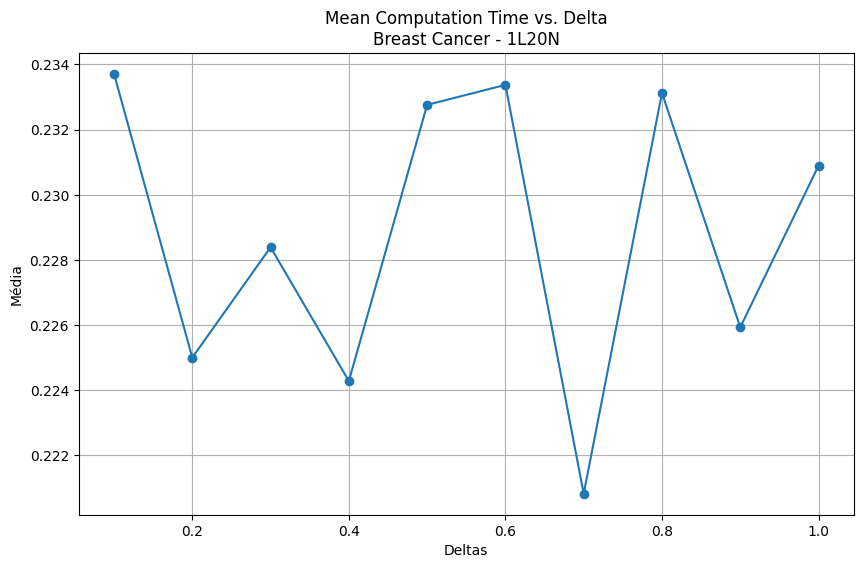

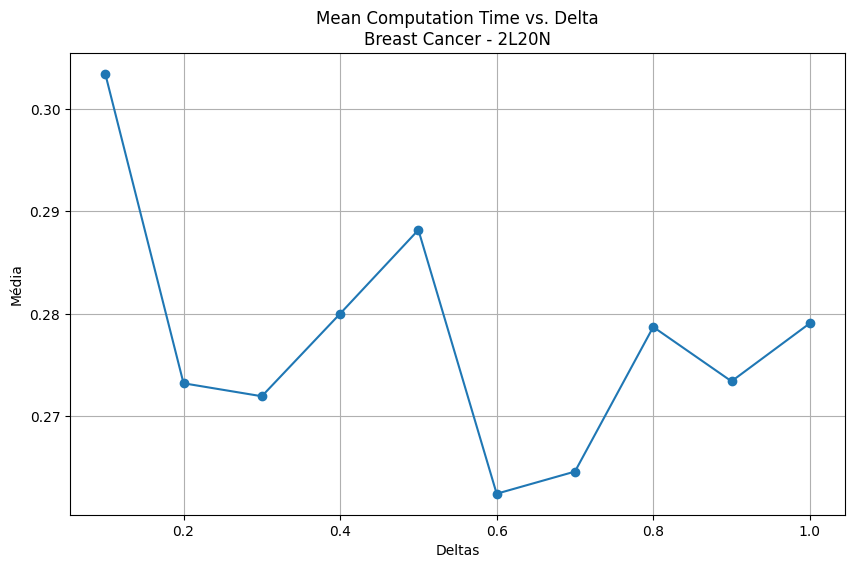

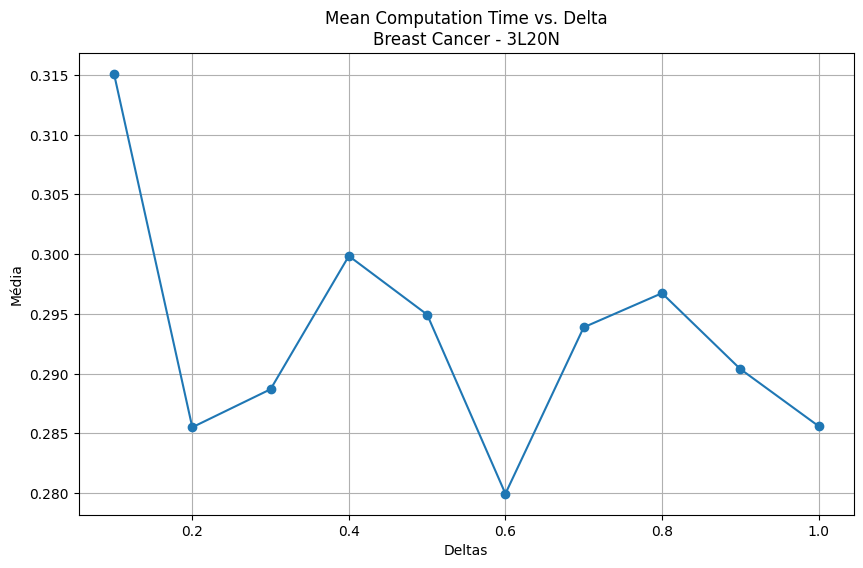

In [84]:
plot_mean_values(breast_cancer_m1, 'Mean Computation Time vs. Delta\nBreast Cancer - 1L20N')
plot_mean_values(breast_cancer_m2, 'Mean Computation Time vs. Delta\nBreast Cancer - 2L20N')
plot_mean_values(breast_cancer_m3, 'Mean Computation Time vs. Delta\nBreast Cancer - 3L20N')

# Glass

In [85]:
glass_m1, glass_m1_mean, glass_m1_std = process_model_data(glass, 'model_1layers_20neurons.h5', deltas)
glass_m2, glass_m2_mean, glass_m2_std = process_model_data(glass, 'model_2layers_20neurons.h5', deltas)
glass_m3, glass_m3_mean, glass_m3_std = process_model_data(glass, 'model_3layers_20neurons.h5', deltas)

format_mean_std(glass_m1_mean, glass_m2_mean, glass_m3_mean, glass_m1_std, glass_m2_std, glass_m3_std, deltas)

,1L20N,2L20N,3L20N
0.1,8.91 ± 0.8955,9.00 ± 0.0000,9.00 ± 0.0000
0.2,8.91 ± 0.8955,9.00 ± 0.0000,9.00 ± 0.0000
0.3,8.91 ± 0.8955,9.00 ± 0.0000,9.00 ± 0.0000
0.4,8.91 ± 0.8955,9.00 ± 0.0000,9.00 ± 0.0000
0.5,8.92 ± 0.7960,9.00 ± 0.0000,9.00 ± 0.0000
0.6,8.92 ± 0.7960,9.00 ± 0.0000,9.00 ± 0.0000
0.7,8.93 ± 0.6965,9.00 ± 0.0000,9.00 ± 0.0000
0.8,8.93 ± 0.6965,9.00 ± 0.0000,9.00 ± 0.0000
0.9,8.94 ± 0.5970,9.00 ± 0.0000,9.00 ± 0.0000
1.0,8.94 ± 0.5970,9.00 ± 0.0000,9.00 ± 0.0000


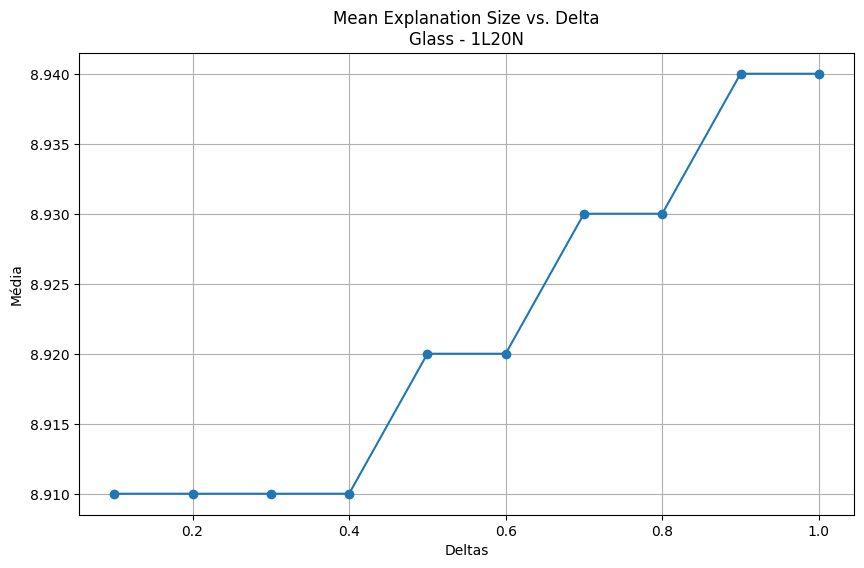

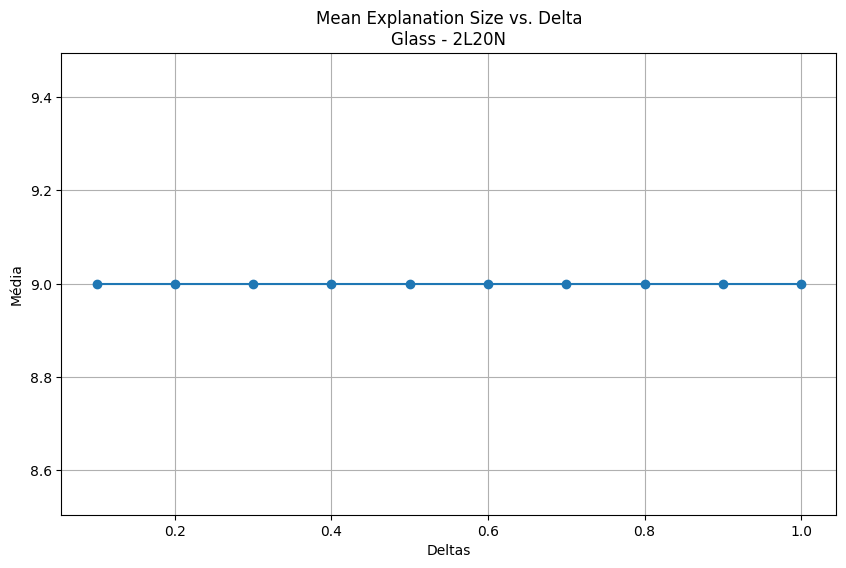

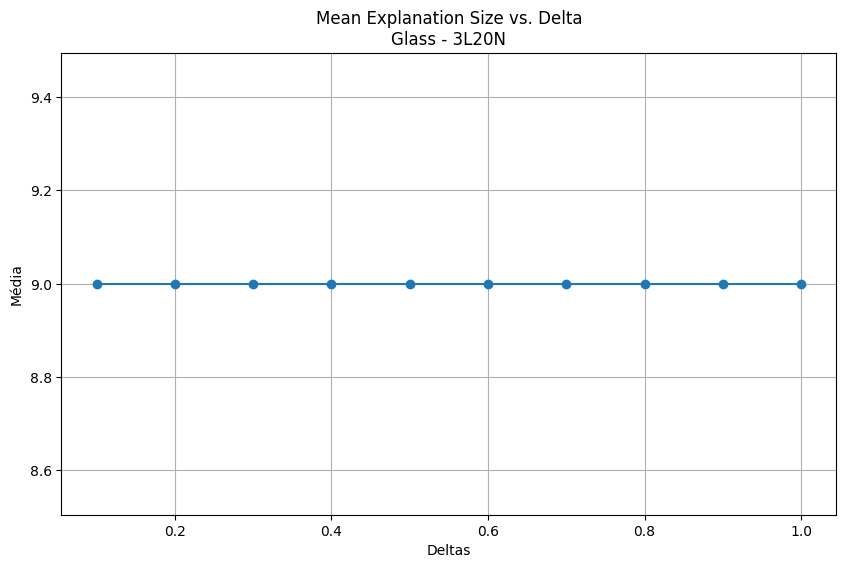

In [86]:
plot_mean_values(glass_m1, 'Mean Explanation Size vs. Delta\nGlass - 1L20N')
plot_mean_values(glass_m2, 'Mean Explanation Size vs. Delta\nGlass - 2L20N')
plot_mean_values(glass_m3, 'Mean Explanation Size vs. Delta\nGlass - 3L20N')

In [87]:
glass_m1, glass_m1_mean, glass_m1_std = process_model_data(glass, 'model_1layers_20neurons.h5', deltas, column_name='time_milp_relaxed')
glass_m2, glass_m2_mean, glass_m2_std = process_model_data(glass, 'model_2layers_20neurons.h5', deltas, column_name='time_milp_relaxed')
glass_m3, glass_m3_mean, glass_m3_std = process_model_data(glass, 'model_3layers_20neurons.h5', deltas, column_name='time_milp_relaxed')

format_mean_std(glass_m1_mean, glass_m2_mean, glass_m3_mean, glass_m1_std, glass_m2_std, glass_m3_std, deltas, mean_format="{:.4f}", std_format="{:.4f}")

,1L20N,2L20N,3L20N
0.1,0.1050 ± 0.0566,0.1278 ± 0.0631,0.1975 ± 0.1232
0.2,0.0870 ± 0.0300,0.1015 ± 0.0173,0.1604 ± 0.0728
0.3,0.0851 ± 0.0296,0.1088 ± 0.0334,0.1569 ± 0.0543
0.4,0.0838 ± 0.0201,0.1056 ± 0.0189,0.1568 ± 0.0523
0.5,0.0903 ± 0.0403,0.1131 ± 0.0423,0.1660 ± 0.0713
0.6,0.0857 ± 0.0240,0.1126 ± 0.0423,0.1662 ± 0.0624
0.7,0.0878 ± 0.0358,0.1113 ± 0.0272,0.1826 ± 0.1108
0.8,0.0871 ± 0.0301,0.1177 ± 0.0426,0.1849 ± 0.0914
0.9,0.0854 ± 0.0160,0.1166 ± 0.0498,0.1946 ± 0.1096
1.0,0.0893 ± 0.0302,0.1210 ± 0.0451,0.1824 ± 0.0819


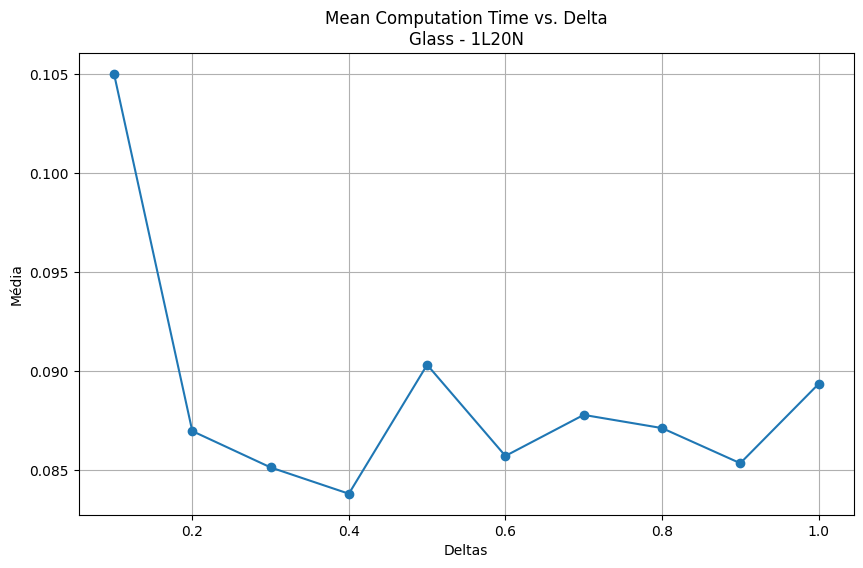

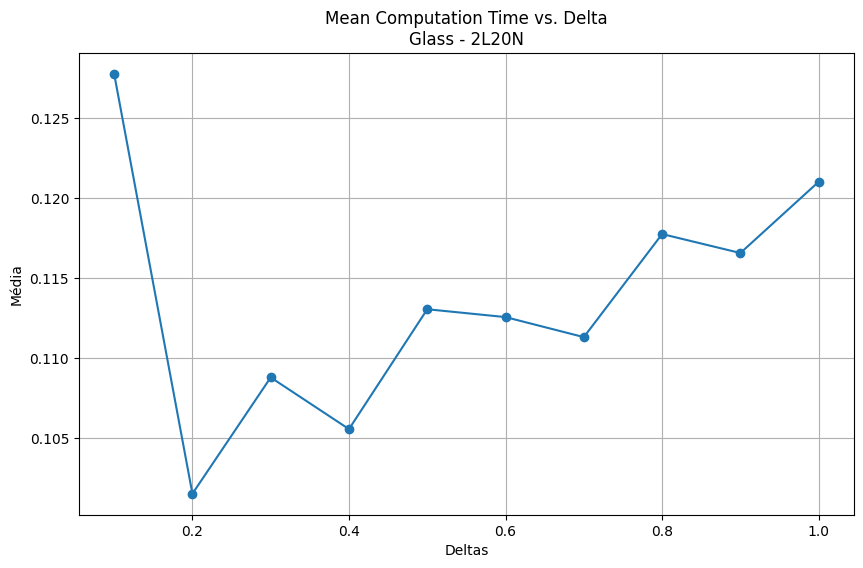

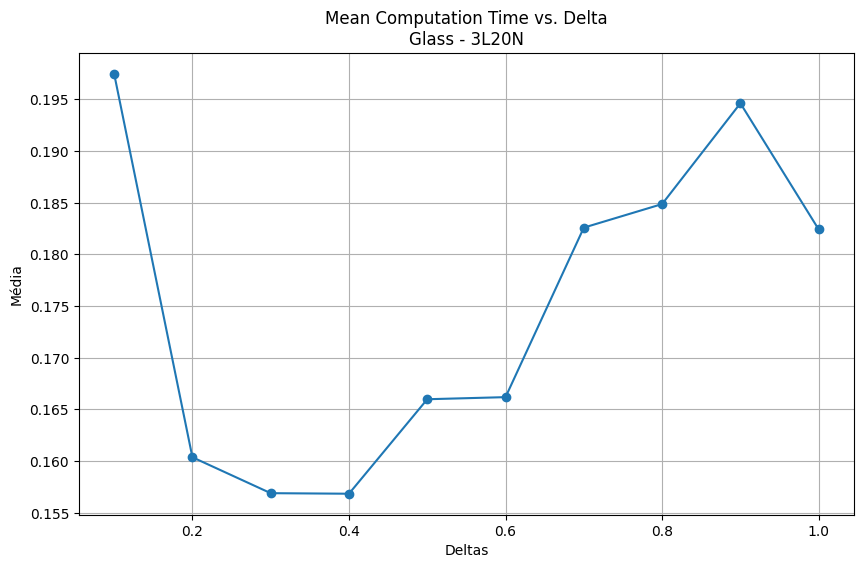

In [88]:

plot_mean_values(glass_m1, 'Mean Computation Time vs. Delta\nGlass - 1L20N')
plot_mean_values(glass_m2, 'Mean Computation Time vs. Delta\nGlass - 2L20N')
plot_mean_values(glass_m3, 'Mean Computation Time vs. Delta\nGlass - 3L20N')

# Digits

In [89]:
digits_m1, digits_m1_mean, digits_m1_std = process_model_data(digits, 'model_1layers_20neurons.h5', deltas)
digits_m2, digits_m2_mean, digits_m2_std = process_model_data(digits, 'model_2layers_20neurons.h5', deltas)
digits_m3, digits_m3_mean, digits_m3_std = process_model_data(digits, 'model_3layers_20neurons.h5', deltas)

format_mean_std(digits_m1_mean, digits_m2_mean, digits_m3_mean, digits_m1_std, digits_m2_std, digits_m3_std, deltas)

,1L20N,2L20N,3L20N
0.1,64.00 ± 0.0000,64.00 ± 0.0000,64.00 ± 0.0000
0.2,64.00 ± 0.0000,64.00 ± 0.0000,64.00 ± 0.0000
0.3,64.00 ± 0.0000,64.00 ± 0.0000,64.00 ± 0.0000
0.4,64.00 ± 0.0000,64.00 ± 0.0000,64.00 ± 0.0000
0.5,64.00 ± 0.0000,64.00 ± 0.0000,64.00 ± 0.0000
0.6,64.00 ± 0.0000,64.00 ± 0.0000,64.00 ± 0.0000
0.7,64.00 ± 0.0000,64.00 ± 0.0000,64.00 ± 0.0000
0.8,64.00 ± 0.0000,64.00 ± 0.0000,64.00 ± 0.0000
0.9,64.00 ± 0.0000,64.00 ± 0.0000,64.00 ± 0.0000
1.0,64.00 ± 0.0000,64.00 ± 0.0000,64.00 ± 0.0000


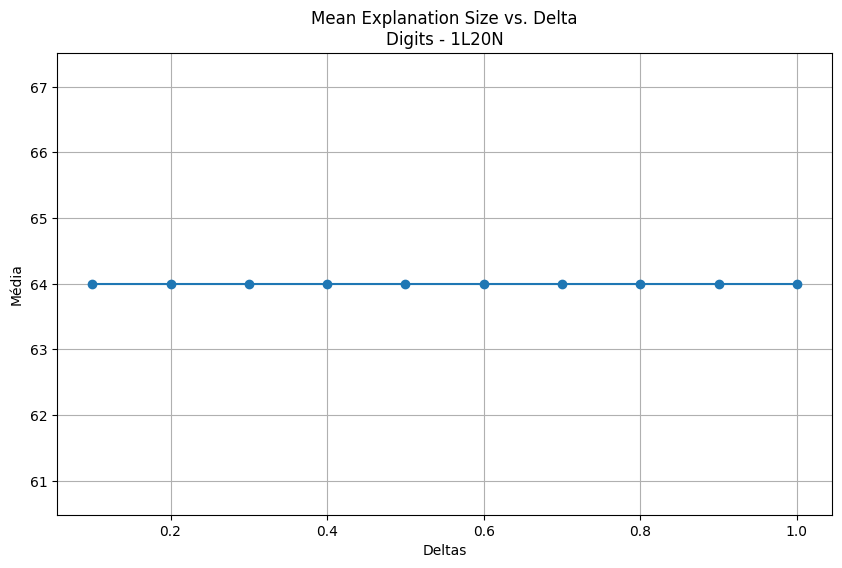

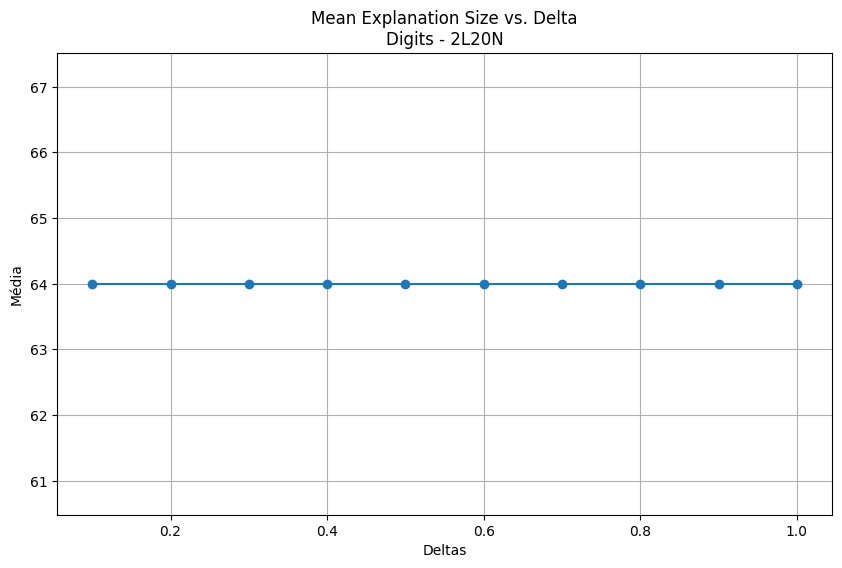

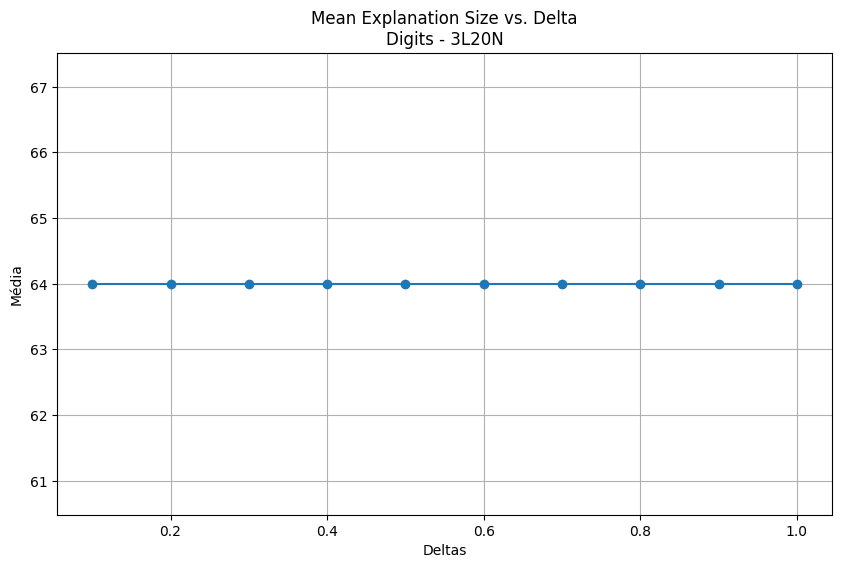

In [90]:
plot_mean_values(digits_m1, 'Mean Explanation Size vs. Delta\nDigits - 1L20N')
plot_mean_values(digits_m2, 'Mean Explanation Size vs. Delta\nDigits - 2L20N')
plot_mean_values(digits_m3, 'Mean Explanation Size vs. Delta\nDigits - 3L20N')

In [91]:
digits_m1, digits_m1_mean, digits_m1_std = process_model_data(digits, 'model_1layers_20neurons.h5', deltas, column_name='time_milp_relaxed')
digits_m2, digits_m2_mean, digits_m2_std = process_model_data(digits, 'model_2layers_20neurons.h5', deltas, column_name='time_milp_relaxed')
digits_m3, digits_m3_mean, digits_m3_std = process_model_data(digits, 'model_3layers_20neurons.h5', deltas, column_name='time_milp_relaxed')

format_mean_std(digits_m1_mean, digits_m2_mean, digits_m3_mean, digits_m1_std, digits_m2_std, digits_m3_std, deltas, mean_format="{:.4f}", std_format="{:.4f}")

,1L20N,2L20N,3L20N
0.1,0.7076 ± 0.4267,0.7217 ± 0.4297,0.7100 ± 0.1542
0.2,0.7590 ± 0.7808,0.6991 ± 0.2874,0.7423 ± 0.2015
0.3,0.6902 ± 0.4203,0.7152 ± 0.3338,0.7344 ± 0.2229
0.4,0.6302 ± 0.2123,0.7075 ± 0.3162,0.7096 ± 0.1956
0.5,0.6736 ± 0.3321,0.7184 ± 0.3629,0.7276 ± 0.2145
0.6,0.6676 ± 0.2800,0.6842 ± 0.1942,0.7112 ± 0.1508
0.7,0.6421 ± 0.3601,0.7119 ± 0.3173,0.7065 ± 0.1706
0.8,0.6597 ± 0.3016,0.7130 ± 0.3151,0.7294 ± 0.2224
0.9,0.6718 ± 0.4667,0.6729 ± 0.1719,0.6938 ± 0.1446
1.0,0.6951 ± 0.4696,0.7164 ± 0.5096,0.6888 ± 0.1386


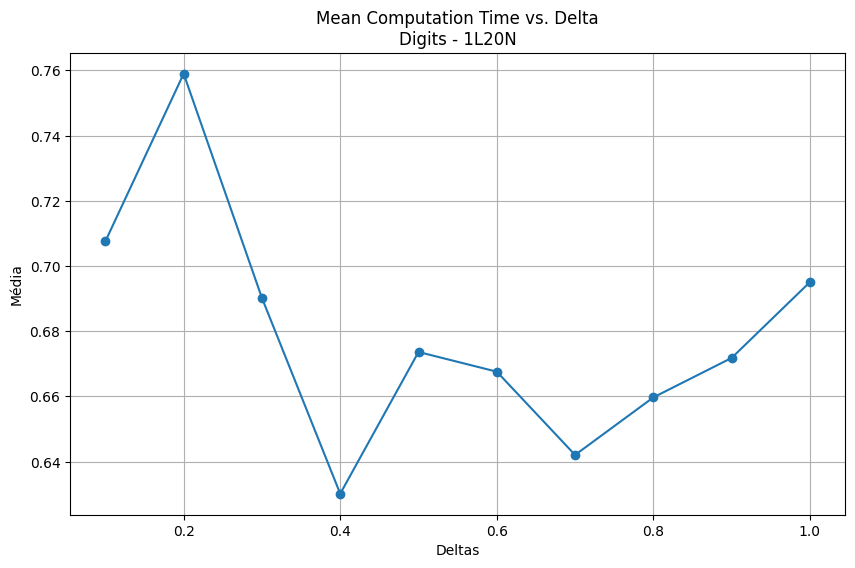

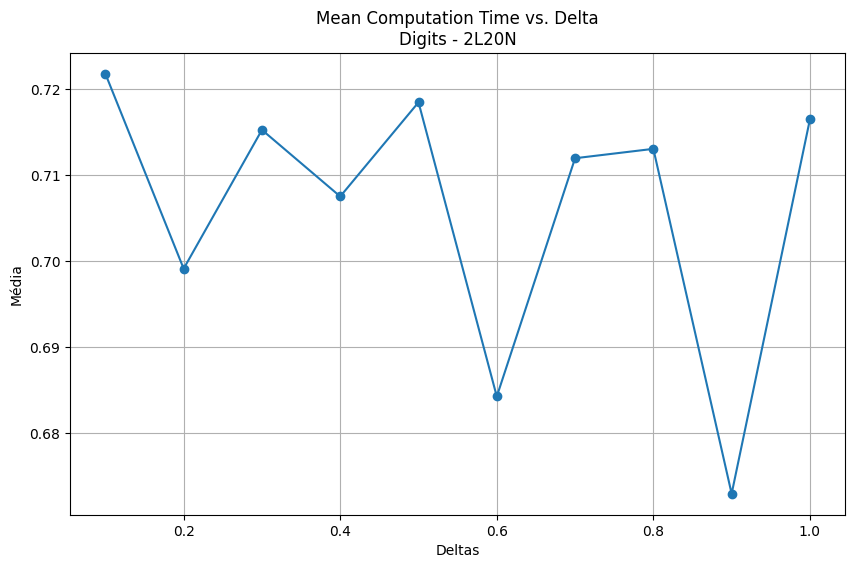

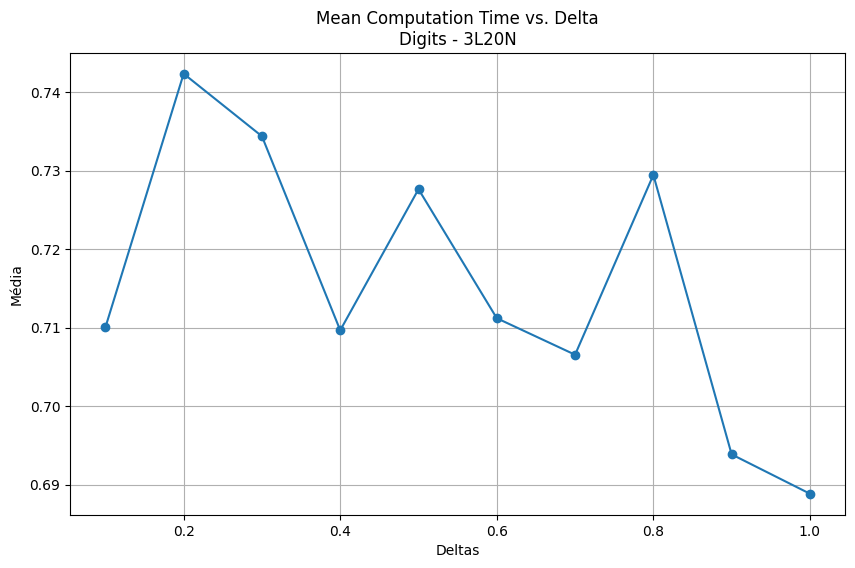

In [92]:
plot_mean_values(digits_m1, 'Mean Computation Time vs. Delta\nDigits - 1L20N')
plot_mean_values(digits_m2, 'Mean Computation Time vs. Delta\nDigits - 2L20N')
plot_mean_values(digits_m3, 'Mean Computation Time vs. Delta\nDigits - 3L20N')